In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import cv2
import numpy
number_of_frames = 1000
kernel_size = (7,7)
capture = cv2.VideoCapture(video_path)
color = (255, 255, 0)
box_color =(0,255,0)
thickness = 5
high_threshold = 0
low_threshold = 55



def draw_contours(dilation, frame):
  contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  for contour in contours:

    area = cv2.contourArea(contour)

    if area > 100:
      cv2.drawContours(frame,contour,-1,color,thickness)
      perimeter = cv2.arcLength(contour,True)
      approximation = cv2.approxPolyDP(contour, 0.02 * perimeter , True)
      x,y, width, height =cv2.boundingRect(approximation)
      cv2.rectangle(frame, (x,y), (x + width,y + height),box_color,thickness)

  return frame

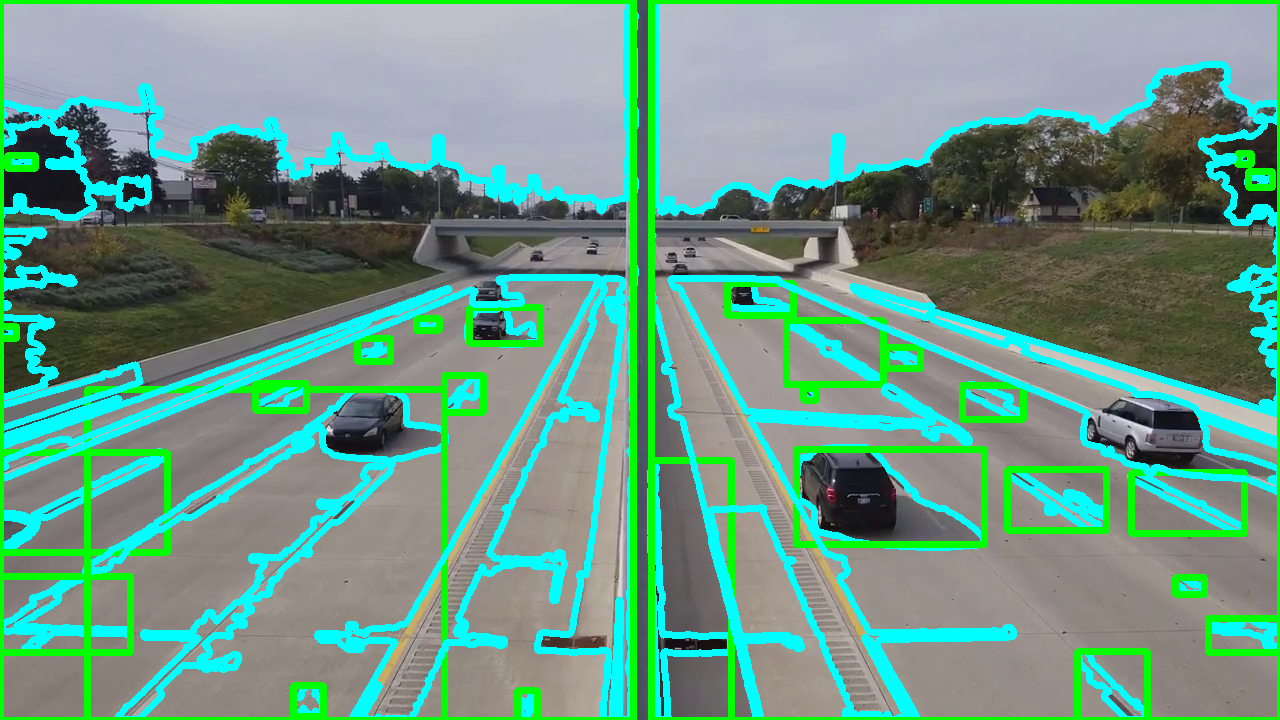

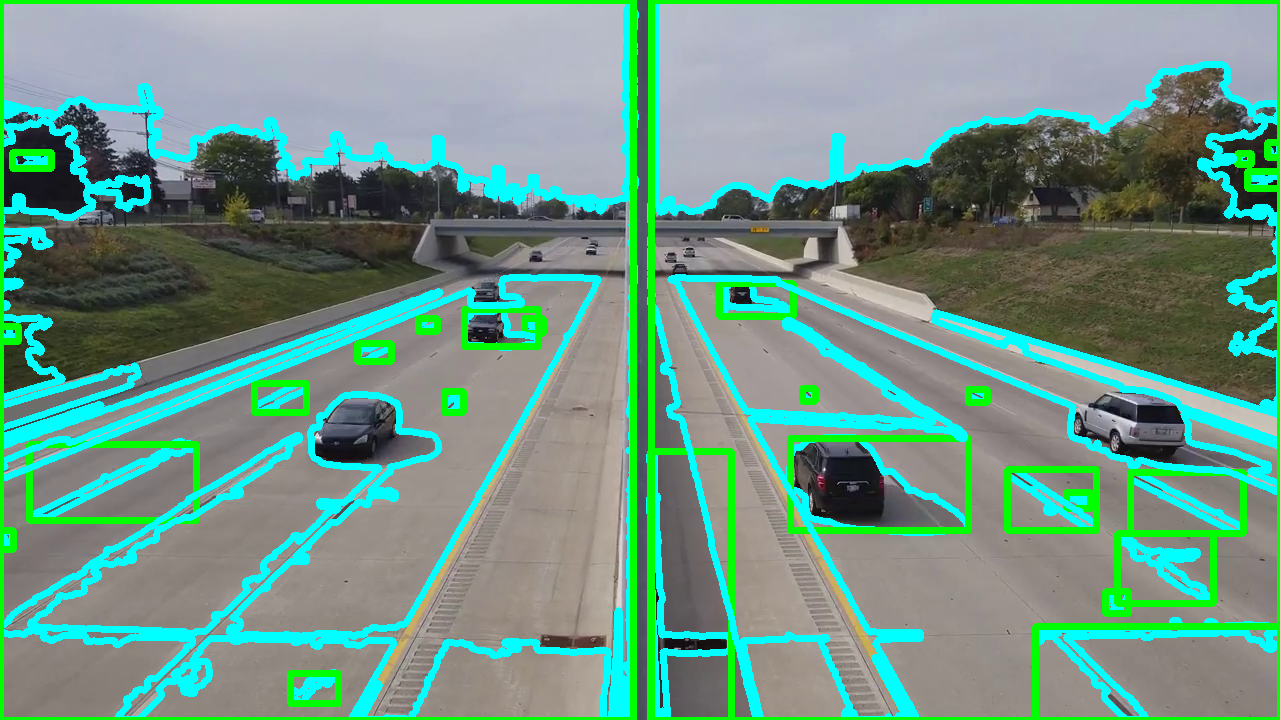

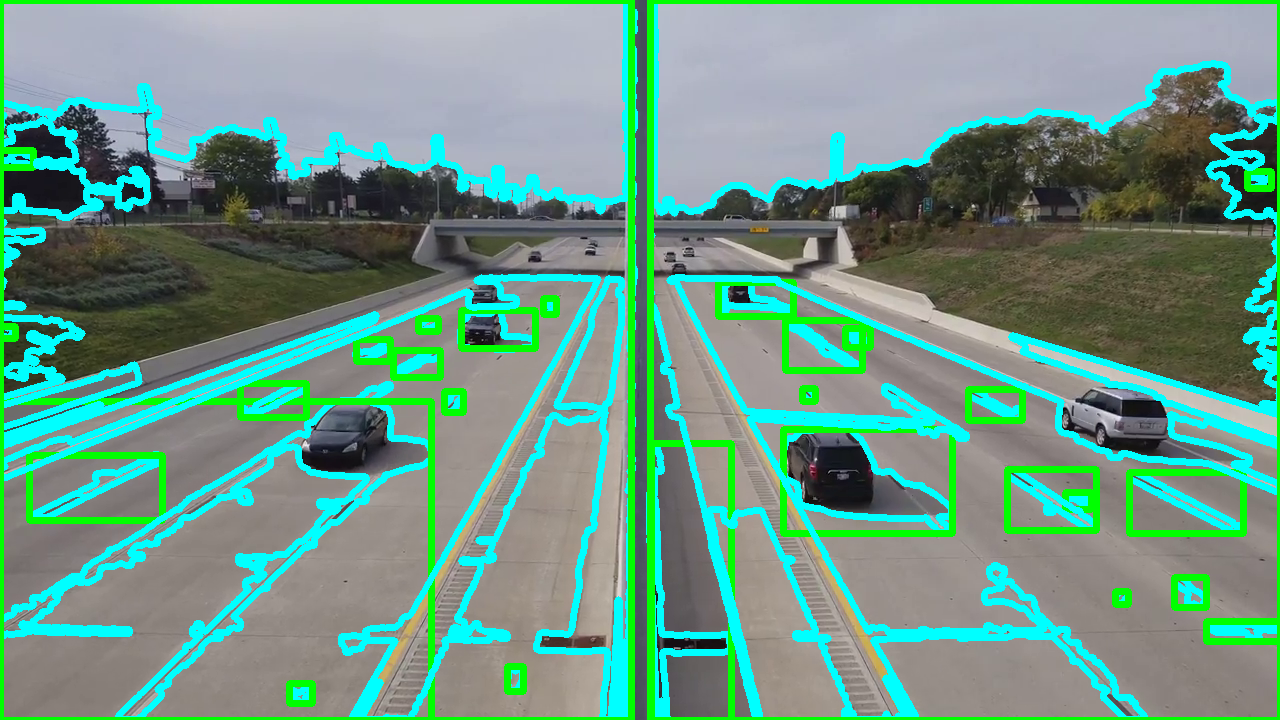

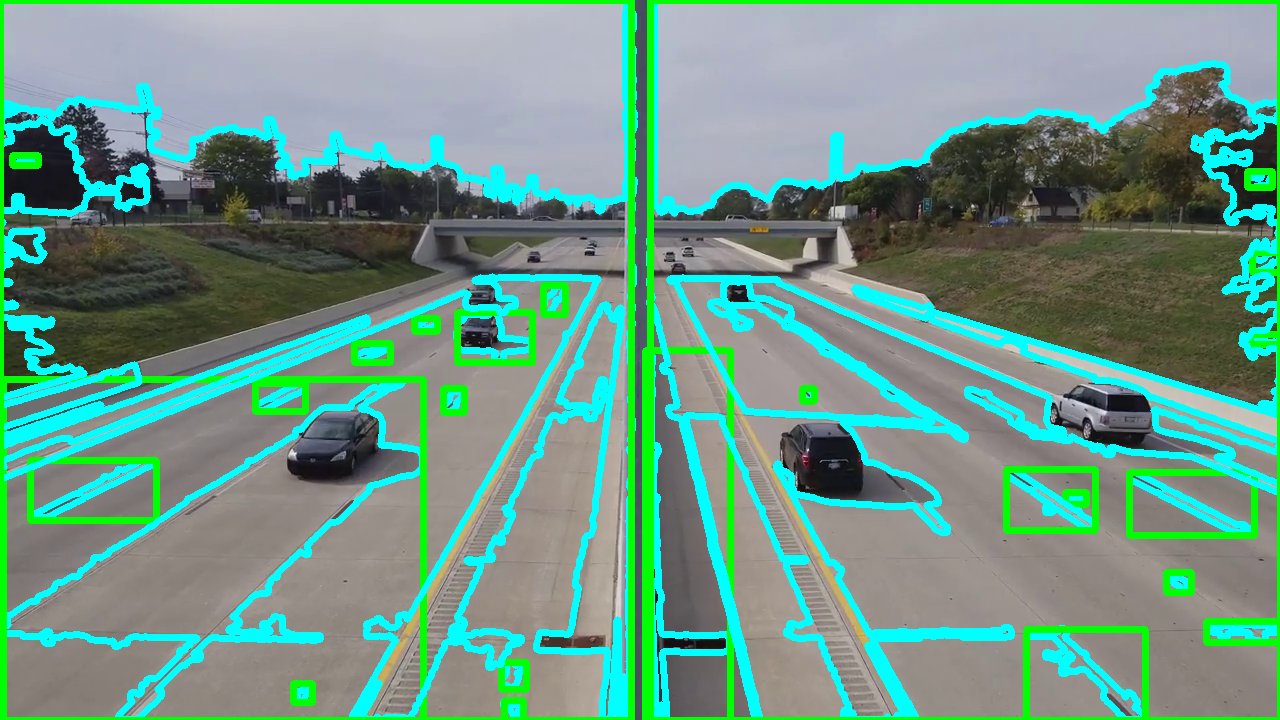

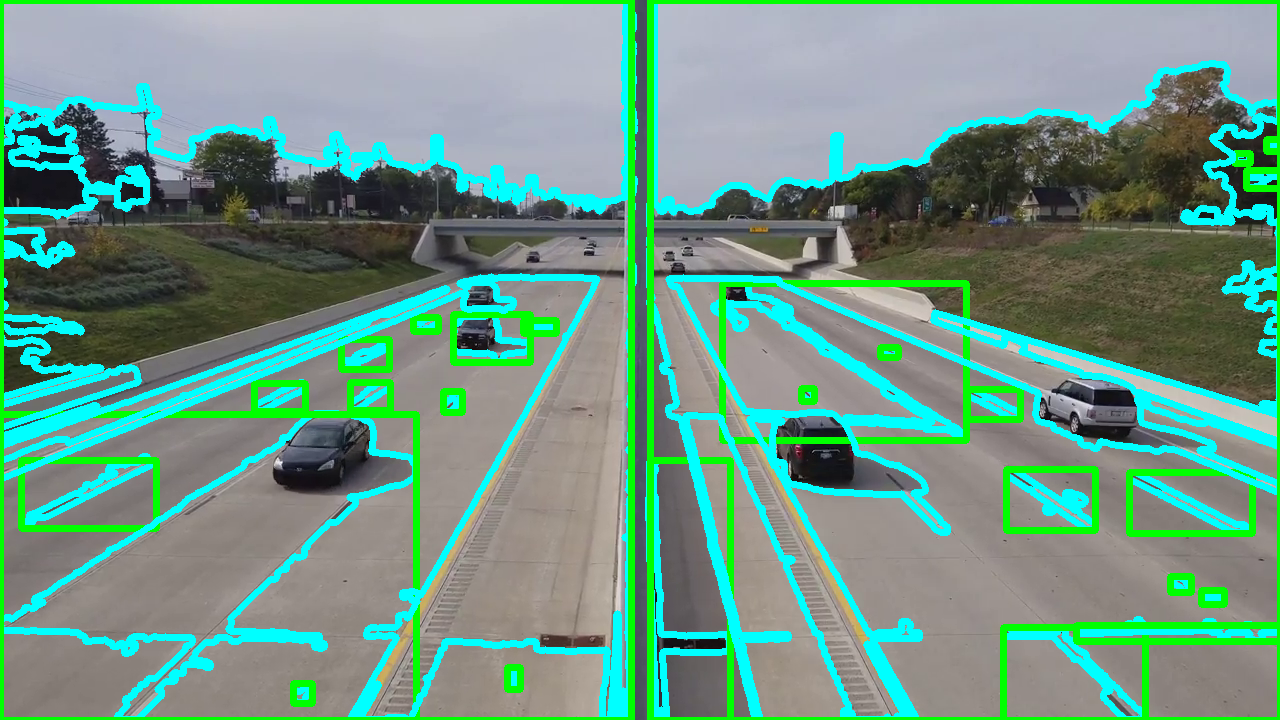

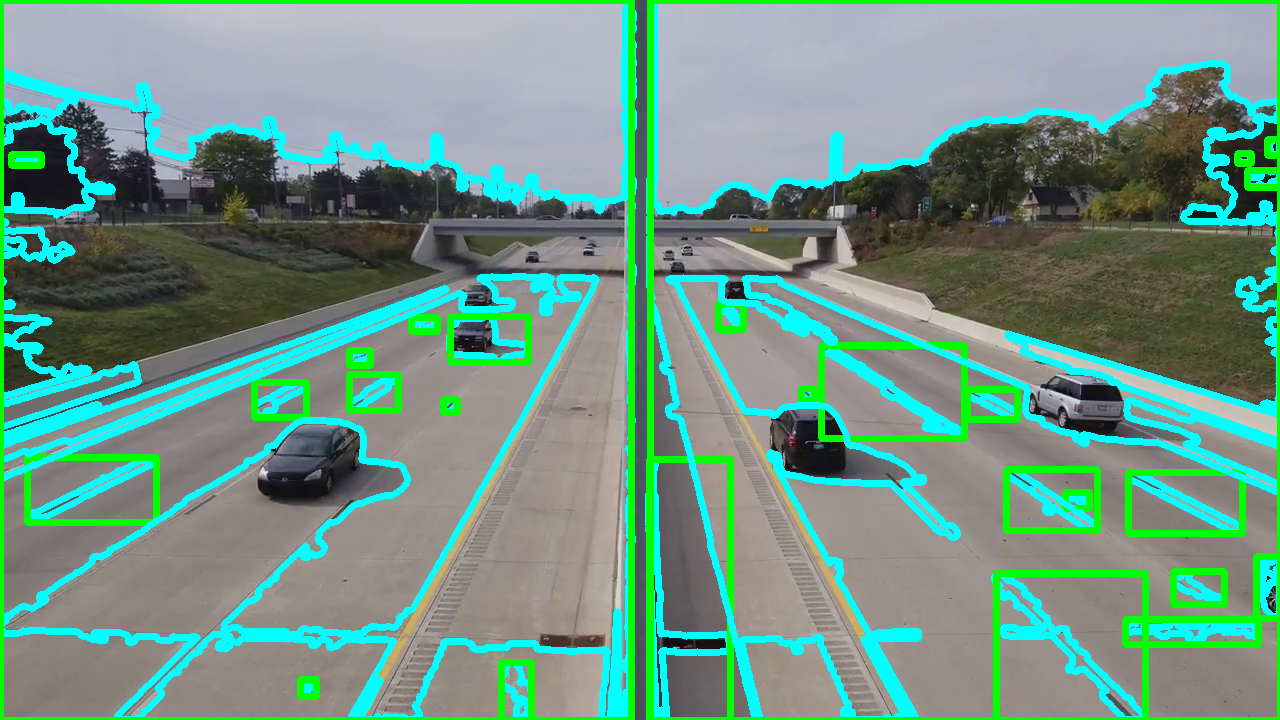

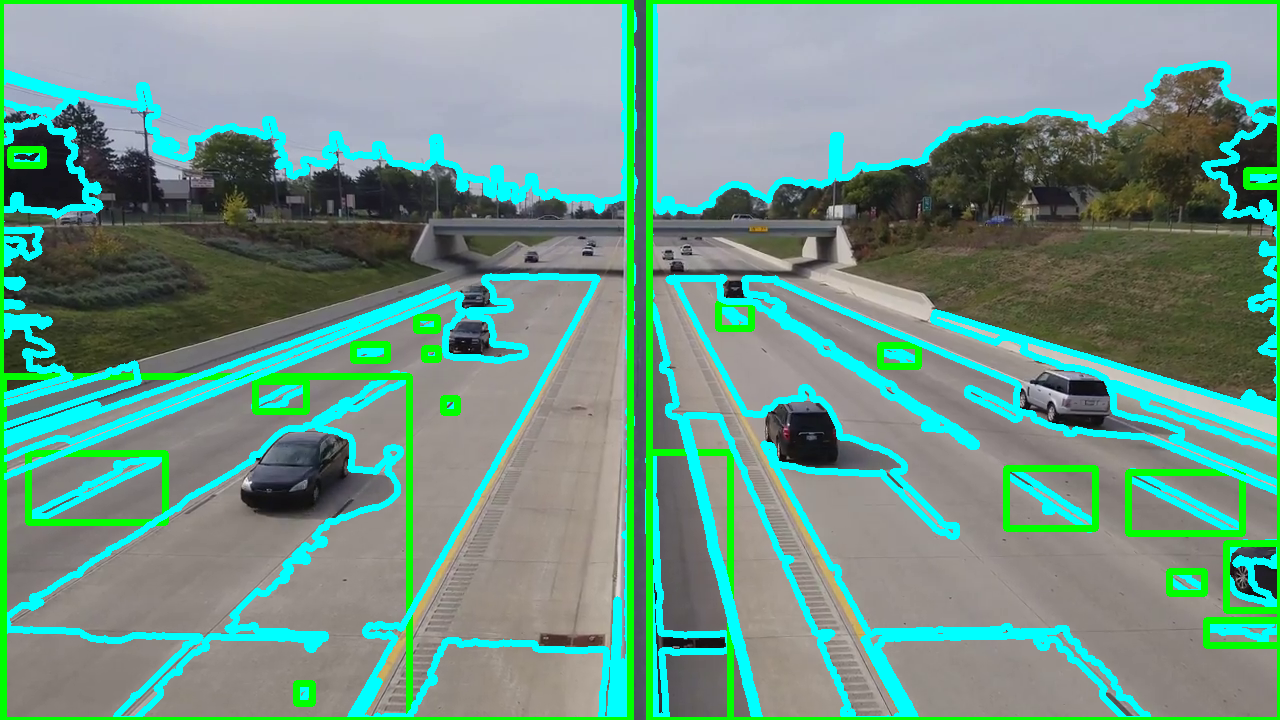

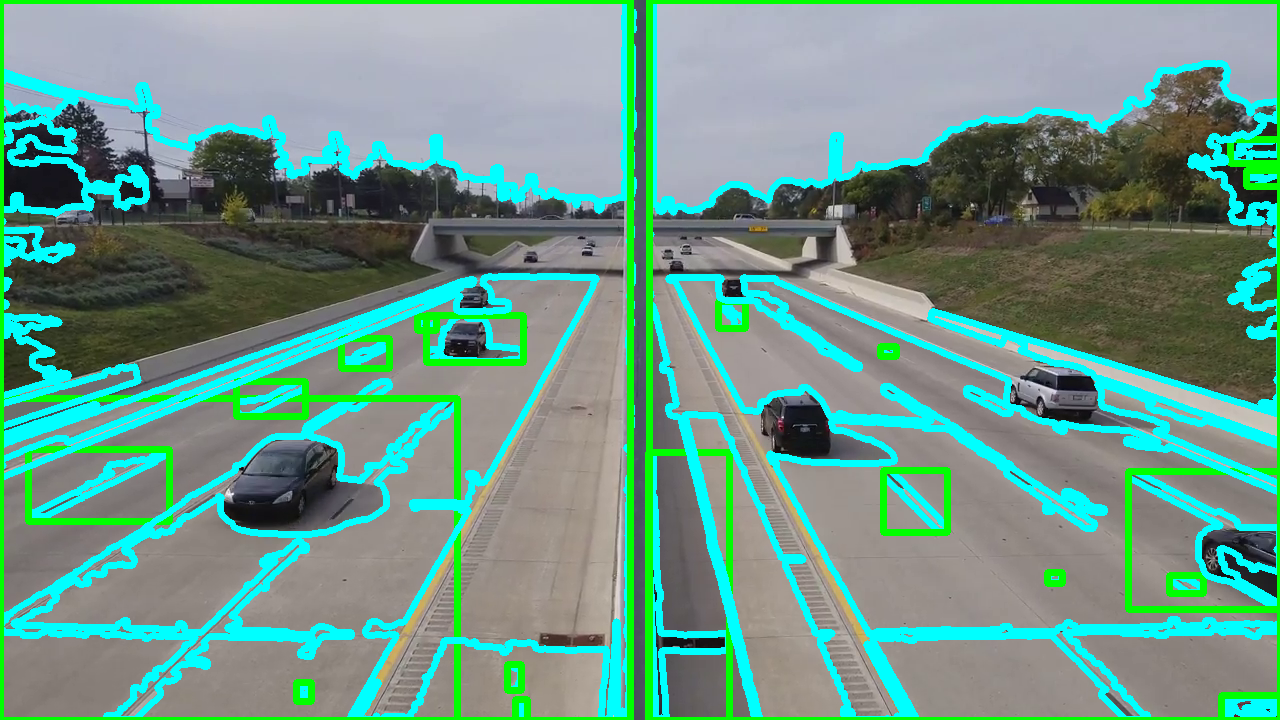

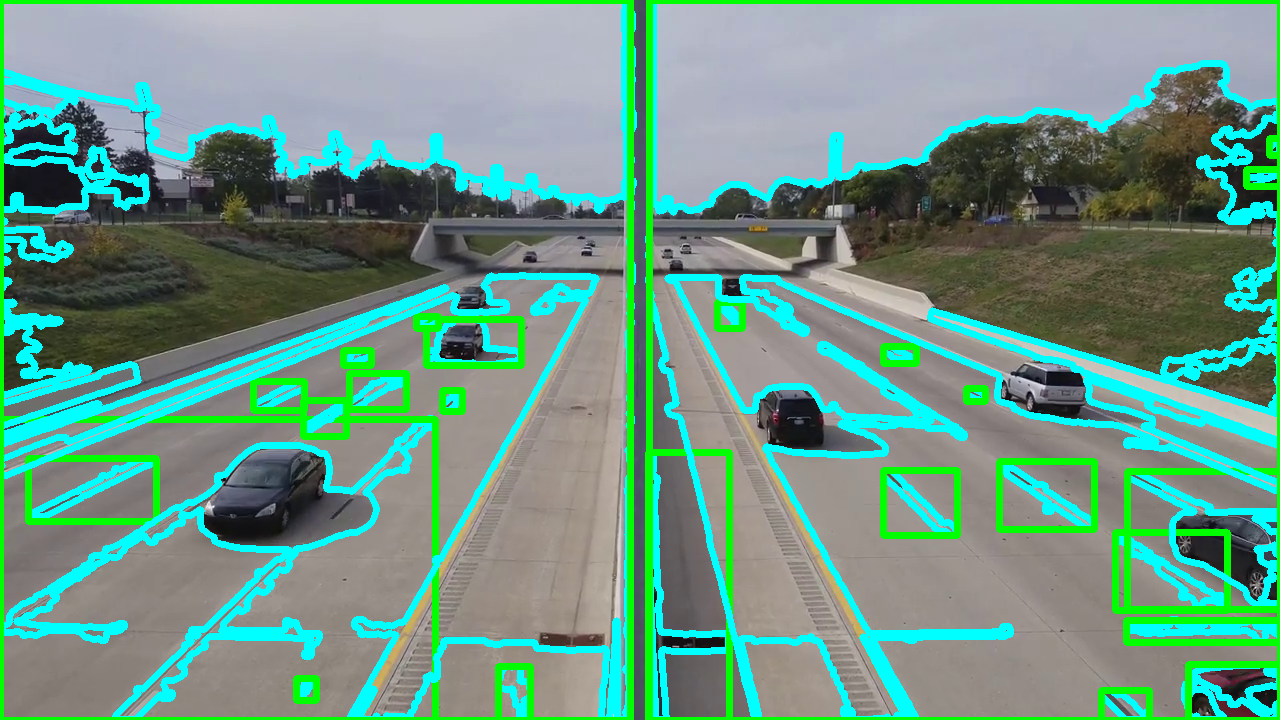

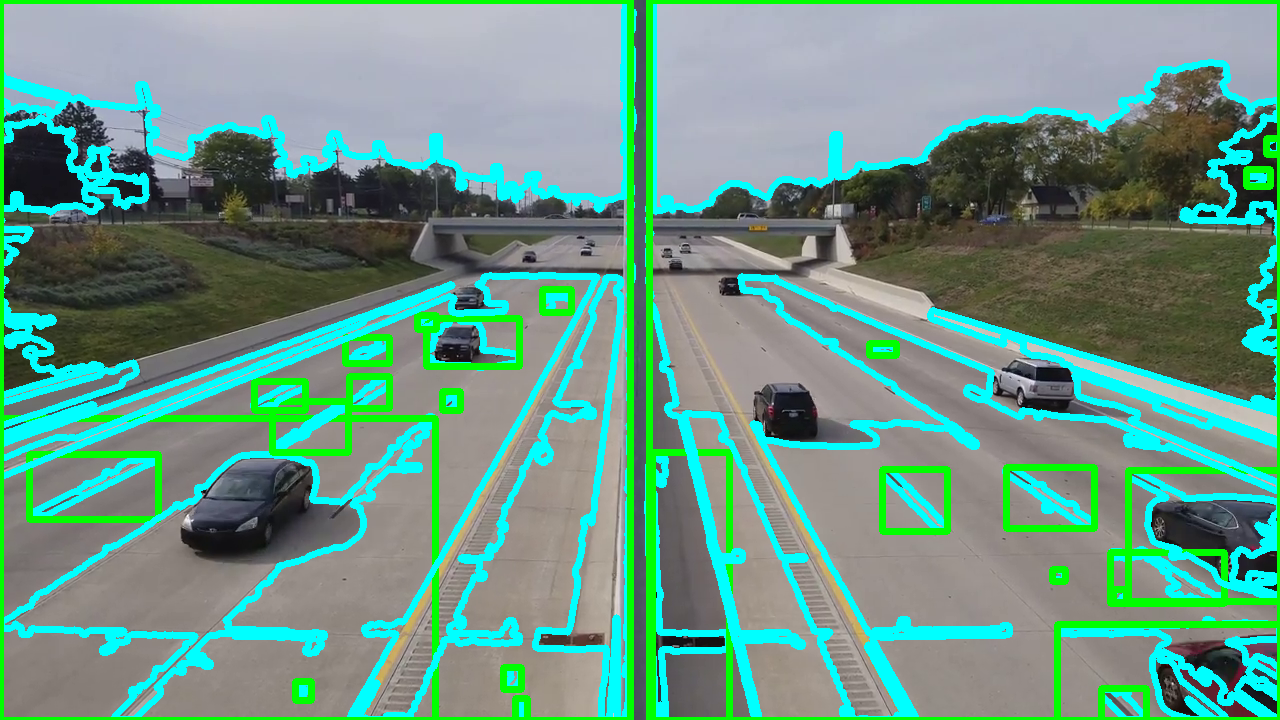

In [23]:

video_path = "/content/drive/MyDrive/Colab Notebooks/4K Video of Highway Traffic!.mp4"



from google.colab.patches import cv2_imshow

frame_list = []
for index in range(number_of_frames):
 _, frame = capture.read()
 blur = cv2.GaussianBlur(frame, kernel_size,1) 
 gray_image = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
 canny = cv2.Canny(gray_image,high_threshold,low_threshold)
 kernel = numpy.ones((5,5))
 dilated = cv2.dilate(canny, kernel, iterations = 1)

 new_image = draw_contours(dilated, frame)

 cv2_imshow(new_image)

 height, width, colors = new_image.shape
 size =(width, height)

In [ ]:
frame

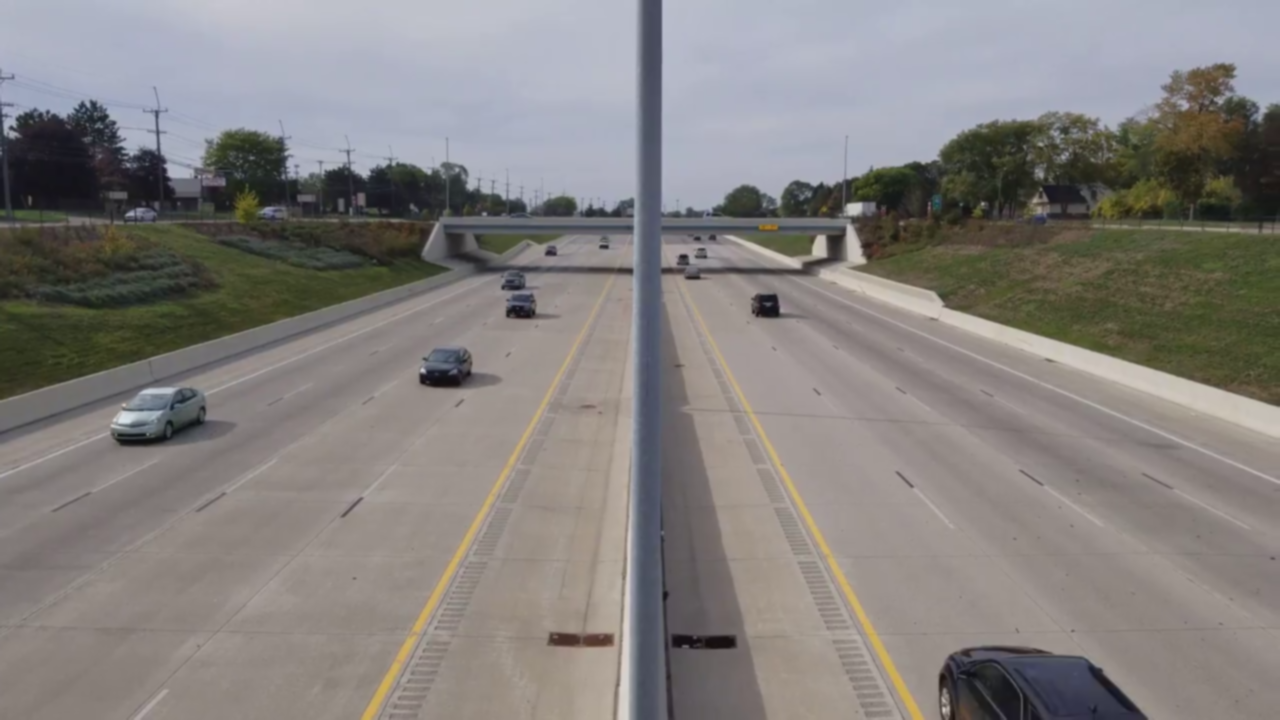

In [9]:
 cv2_imshow(blur)

In [24]:
output_path = "Contour.avi"
frames_per_second = 30
output = cv2.VideoWriter(output_path,cv2.VideoWriter_fourcc(*"DIVX"),frames_per_second,size)

for frame in range(len(frame_list)):
  output.write(frame_list[frame])

output.release()